<a href="https://colab.research.google.com/github/ejprince/audiostudies-stanford/blob/main/Creating_Tones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AUDIO-RATE SAMPLED SINE WAVE:**




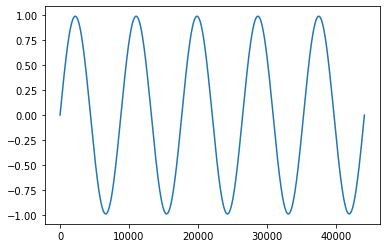

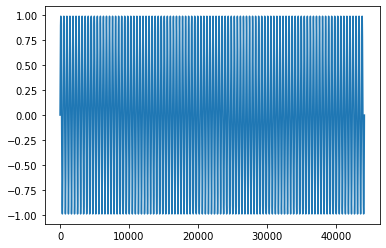

In [3]:
import numpy as np
import matplotlib.pyplot as pyplot
import IPython

# sineTone will generate an audio-rate sampled sine wave. 
# It takes in a sampling rate, frequency, & duration, & outputs an array representing the tone.
def sineTone(fs, frequency, duration):
  t = np.linspace(0,duration,int(fs*duration))
  output = .99*np.sin(2*np.pi*frequency*t)
  return output

# Tests:
# Inaudible:
tone = sineTone(44100, 5, 1)
pyplot.plot(tone)
IPython.display.Audio(tone,rate=44100)
# Audible:
pyplot.figure()
tone = sineTone(44100, 100, 1)
pyplot.plot(tone)
IPython.display.Audio(tone,rate=44100)

**RAMPING TONE UP (AND DOWN)**

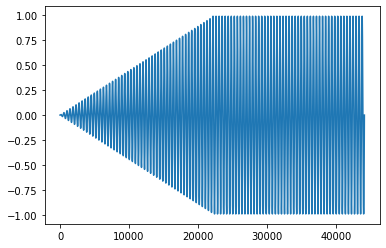

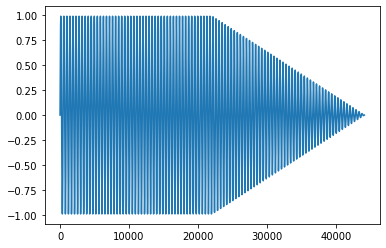

In [4]:
# rampUp takes in a sampling rate, duration, & input tone, & it ramps the tone's beginning.
def rampUp(fs, duration, input):
  t_ramp = np.linspace(0,0.99,int(fs*duration))
  multiplier_ramp = t_ramp
  output_ramp = input
  # Replace beginning of tone with ramp:
  output_ramp[0:t_ramp.size] = input[0:t_ramp.size]*multiplier_ramp
  return output_ramp

# rampDown takes in a sampling rate, duration, & input tone, & it ramps the tone's end.
def rampDown(fs, duration, input):
  t_ramp = np.flip(np.linspace(0,1,int(fs*duration)))
  multiplier_ramp = t_ramp
  output_ramp = input
  # Replace beginning of tone with ramp:
  output_ramp[input.size-t_ramp.size:input.size] = input[input.size-t_ramp.size:input.size]*multiplier_ramp
  return output_ramp

# Tests:
# Ramp Up:
tone = sineTone(44100,100,1)
ramp_tone = rampUp(44100,0.5,tone)
pyplot.plot(ramp_tone)
IPython.display.Audio(ramp_tone,rate=44100)
# Ramp Down:
pyplot.figure()
tone = sineTone(44100,100,1)
ramp_tone = rampDown(44100,0.5,tone)
pyplot.plot(ramp_tone)
IPython.display.Audio(ramp_tone,rate=44100)

**COMPLEX SOUNDS MORPHING MULTIPLE TONES**

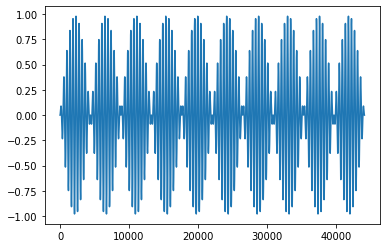

In [5]:
# Create two singular tones:
tone_A = sineTone(44100, 5, 1)
tone_B = sineTone(44100, 100, 1)
# Multiply tones together:
tone_product = tone_A * tone_B
# Plot:
pyplot.plot(tone_product)
IPython.display.Audio(tone_product,rate=44100)

**AUDIBLE COMBINATIONS OF RAMPING**

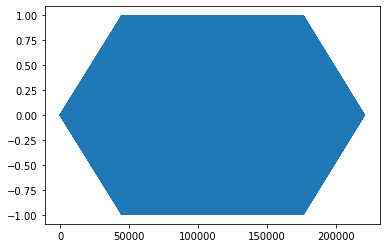

In [6]:
# Create tone:
tone_soundlike = rampDown(44100, 1, rampUp(44100, 1, sineTone(44100, 200, 5)));
# Plot:
pyplot.plot(tone_soundlike)
IPython.display.Audio(tone_soundlike,rate=44100)

**PLOTTING FOR VISUAL EASE**

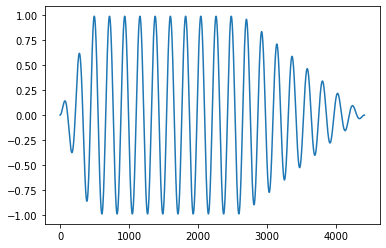

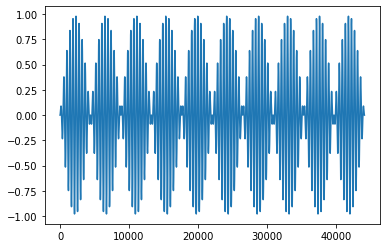

In [ ]:
# Described function:
tone_looklike = rampDown(44100, 0.04, rampUp(44100, 0.01, sineTone(44100, 200, 0.1)));
pyplot.plot(tone_looklike)
IPython.display.Audio(tone_looklike,rate=44100)
# Complex sound:
pyplot.figure()
pyplot.plot(tone_product)
IPython.display.Audio(tone_product,rate=44100)